In [3]:
##------- 1. Load libraries & model
from transformers import BertTokenizer, BertForMaskedLM, BertModel
import torch
# Load pretrained model/tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

##------- 2. Encode a Sentence and View Token Embeddings
# Input sentence
text = "Paris is beautiful in the summer."
# Tokenize input
inputs = tokenizer(text, return_tensors='pt')
with torch.no_grad():
 outputs = model(**inputs)
# Get the last hidden state
last_hidden_states = outputs.last_hidden_state
print("Token embeddings shape:", last_hidden_states.shape) # (1, seq_len, hidden_size)
tokens = tokenizer.convert_ids_to_tokens(inputs['input_ids'][0])
for token, vec in zip(tokens, last_hidden_states[0]):
 print(f"{token}: {vec[:5].tolist()}...")


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

c:\Users\administrateur\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\administrateur\.cache\huggingface\hub\models--bert-base-uncased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Token embeddings shape: torch.Size([1, 9, 768])
[CLS]: [0.046577583998441696, -0.03928171843290329, 0.02305682934820652, -0.34294554591178894, -0.065663181245327]...
paris: [0.24879306554794312, -0.9512197971343994, -0.38496628403663635, -0.5746892690658569, 0.523607075214386]...
is: [0.022108938544988632, -0.8659429550170898, 0.05953281372785568, 0.09274950623512268, 0.4881322979927063]...
beautiful: [0.6072089672088623, -0.2864890694618225, 0.18113777041435242, -0.21293313801288605, 0.34957510232925415]...
in: [-1.2017277479171753, -0.8420848250389099, -0.13606473803520203, -0.3403072655200958, -0.667306125164032]...
the: [-0.6877281665802002, -0.9329133033752441, -0.2088976800441742, -0.028589027002453804, 0.11739467829465866]...
summer: [0.041818056255578995, 0.1093817874789238, 0.009873844683170319, -0.11878962814807892, 0.20805516839027405]...
.: [0.3619123101234436, -1.0078741312026978, -0.06511367857456207, 0.15612201392650604, 0.22325602173805237]...
[SEP]: [0.7950266003608704

In [8]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r"C:\Users\administrateur\Downloads\NikeProductDescriptions.csv")

# Define subtitles to keep
target_subtitles = [
    "Men's Shoes", "Men's T-Shirt", "Women's Shoes",
    "Skate Shoes", "Older Kids' T-Shirt"
]

# Filter based on matching or containing 'Shorts'
filtered_df = df[
    df['Subtitle'].isin(target_subtitles) |
    df['Subtitle'].str.contains("Shorts", na=False)
]

# Rename subtitles containing 'Shorts' to 'Shorts'
filtered_df.loc[filtered_df['Subtitle'].str.contains("Shorts", na=False), 'Subtitle'] = "Shorts"


C:\Users\administrateur\AppData\Local\Temp\ipykernel_50824\1154919714.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.loc[filtered_df['Subtitle'].str.contains("Shorts", na=False), 'Subtitle'] = "Shorts"


In [10]:
print(df.columns)


Index(['Title', 'Subtitle', 'Product Description'], dtype='object')


In [11]:
from transformers import BertTokenizer, BertModel
import torch
from tqdm import tqdm

# Load pre-trained BERT
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertModel.from_pretrained("bert-base-uncased")
model.eval()

# Function to compute sentence embeddings
def get_embedding(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=64)
    with torch.no_grad():
        outputs = model(**inputs)
    # Use the [CLS] token's embedding
    return outputs.last_hidden_state[:, 0, :].squeeze().numpy()

# Compute embeddings for each product description
embeddings = []
for desc in tqdm(filtered_df['Product Description'].fillna("")):
    embeddings.append(get_embedding(desc))

import numpy as np
X = np.array(embeddings)



100%|██████████| 155/155 [00:43<00:00,  3.55it/s]


C:\Users\administrateur\AppData\Local\Temp\ipykernel_50824\1699478407.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["PCA1"] = X_pca[:, 0]
C:\Users\administrateur\AppData\Local\Temp\ipykernel_50824\1699478407.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["PCA2"] = X_pca[:, 1]


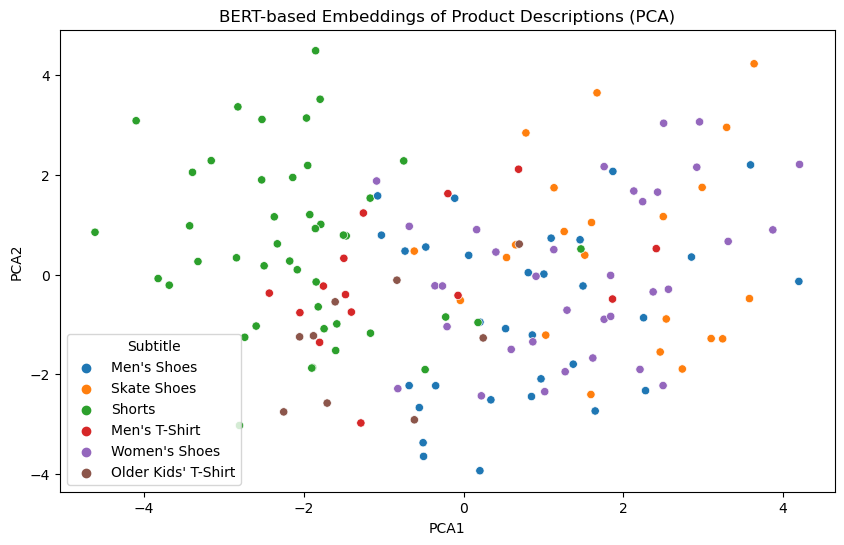

In [13]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Reduce to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot
filtered_df["PCA1"] = X_pca[:, 0]
filtered_df["PCA2"] = X_pca[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=filtered_df,
    x="PCA1", y="PCA2",
    hue="Subtitle",
    palette="tab10"
)
plt.title("BERT-based Embeddings of Product Descriptions (PCA)")
plt.show()
